# A tour of Machine Learning Classifiers Using scikit-learn

We will discuss following things here:-
- Introduction to robust and popular algorithms for classification, such as logistic regression, support vector machines, and decision trees
- Examples and explanations using the scikit-learn machine learning library, which provides a wide variety of machine learning algorithms via user-friendly python API
- Discussions about the strengths and weakness of classifiers with linear and non-linear decision boundaries

# Choosing a classification algorithm

No single classifier works best across all possible scenarios. (No Free Lunch Theorem)

It is always recommended to compare the performance of at least a handful of different learning algorithms to select the best model for the particular problem; these may differ in the number of features or samples, the amount of noise in a dataset, and whether the classes are linearly separable or not.

The five main steps that are involved in training a machine learning algorithm can be summarised as follows:
1. Selecting features and collecting training samples.
2. Choosing a performance metric.
3. Choosing a classifier and optimization algorithm.
4. Evaluating the performance of the model.
5. Tuning the algorithm.

In [1]:
from sklearn import datasets
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
X = iris.data[:,[2,3]]
y = iris.target

print('Class labels:', np.unique(y))

Class labels: [0 1 2]


# Splitting Data For Evaluation

In [4]:
from sklearn.model_selection import train_test_split

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 1, stratify = y)

In [6]:
print('Labels counts in y:', np.bincount(y))
print('Labels counts in y_train', np.bincount(y_train))
print('Labels counts in y_test', np.bincount(y_test))

Labels counts in y: [50 50 50]
Labels counts in y_train [35 35 35]
Labels counts in y_test [15 15 15]


Stratified sampliling equally divide class labels in training set and testing set.

In [7]:
from sklearn.preprocessing import StandardScaler

In [8]:
sc = StandardScaler()
sc.fit(X_train)

X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

In [9]:
from sklearn.linear_model import Perceptron

In [10]:
ppn = Perceptron(max_iter=40, eta0 = 0.1, random_state=1)
ppn.fit(X_train_std,y_train)

Perceptron(alpha=0.0001, class_weight=None, early_stopping=False, eta0=0.1,
           fit_intercept=True, max_iter=40, n_iter_no_change=5, n_jobs=None,
           penalty=None, random_state=1, shuffle=True, tol=0.001,
           validation_fraction=0.1, verbose=0, warm_start=False)

In [11]:
y_pred = ppn.predict(X_test_std)

In [12]:
print('Miscalssified samples: %d'%(y_test != y_pred).sum())

Miscalssified samples: 1


In [13]:
from sklearn.metrics import accuracy_score

In [14]:
print('Accuracy: {0:.2f}'.format(accuracy_score(y_test,y_pred)))

Accuracy: 0.98


In [15]:
#alternative
print('Accuracy: {0:.2f}'.format(ppn.score(X_test_std,y_test)))

Accuracy: 0.98


# Decision Plot Curves

In [16]:
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt

In [17]:
def plot_decision_regions(X, y, classifiers, test_idx = None, resolution = 0.02):
    
    markers = ('s','x','o','^','v')
    colors = ('red','blue','lightgreen','gray','cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min, x1_max = X[:,0].min() - 1, X[:,0].max() + 1
    x2_min, x2_max = X[:,1].min() - 1, X[:,1].max() + 1
    
    xx1, xx2 = np.meshgrid(
        np.arange(x1_min, x1_max, resolution),
        np.arange(x2_min, x2_max, resolution)
    )
    
    Z = classifiers.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, cmap = cmap, alpha = 0.3)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y==cl, 0], y = X[y==cl, 1], alpha = 0.8, c = colors[idx], marker = markers[idx], label = cl, edgecolor='black')
        
    if test_idx:
        X_test, y_test = X[test_idx, :], y[test_idx]
        
        plt.scatter(X_test[:,0], X_test[:,1], c = '', edgecolor='black', alpha = 1.0, linewidth = 1, marker = 'o', s = 100, label = 'test set')

In [18]:
X_combined_std = np.vstack([X_train_std,X_test_std])
y_combined = np.hstack([y_train,y_test])

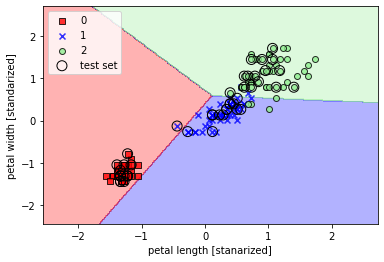

In [19]:
plot_decision_regions(X = X_combined_std, y = y_combined, classifiers= ppn, test_idx= range(105,150))
plt.xlabel('petal length [stanarized]')
plt.ylabel('petal width [standarized]')
plt.legend(loc = 'upper left')
plt.show()

Perceptron algorithm never converges on datasets that aren't perfectly linearly separable, which is why the use of the percpetron algorithm is typically not recommended in practice. It is the Biggest Dis-advantage of the Perceptron.

# Modelling Class probailites via Logistic Regression

Similar to Perceptron and Adaline, the logistic regression model is also a linear model for binary classification that can be extended to mutliclass classification, via the OvR technique (One Vs Rest)

We can consider Logistic Regression as a type of Adaptive Linear neural Network since it uses activation function, in this case activation function is sigmoid function.

## Sigmoid Function

In [20]:
def sigmoid(z):
    return 1.0 / (1.0 + np.exp(-z))

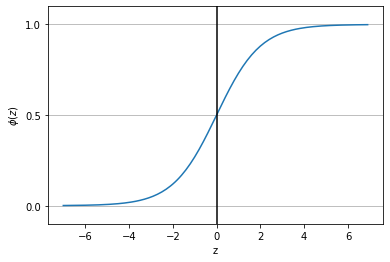

In [21]:
z = np.arange(-7,7,0.1)
phi_z = sigmoid(z)
plt.plot(z,phi_z)
plt.axvline(0.0,c = 'k')
plt.ylim(-0.1,1.1)
plt.xlabel('z')
plt.ylabel('$\phi (z)$')
plt.yticks([0.0,0.5,1.0])
ax = plt.gca()
ax.yaxis.grid(True)

# Learning the weights of the Logistic Cost Function

## Hypothesis

$ \phi{(z)} = \frac {1} {1 + \exp ^{-z}} $

where,
$ z =  W^{T}X $

## Cost Function

$ J(w) = \sum \frac {1} {2} (\phi{(z)} - y) ^{2} $

$ J(w) = \sum _{i=1} ^{n} [ -y ^{(i)} \log {(\phi{(z ^{(i)})})} - (1 - y ^{(i)})\log {(1 - \phi{(z ^{(i)}})} ] $

$ if y = 1; J(\phi{(z), y; w)} = -\log{(\phi{(z)})} $
  
$ if y = 0; J(\phi{(z), y; w)} = -\log(1 - \phi{(z)}) $
    


In [22]:
def cost_1(z):
    return -np.log(sigmoid(z))

def cost_0(z):
    return -np.log(1 - sigmoid(z))

In [23]:
z = np.arange(-10,10,0.1)
phi_z = sigmoid(z)

In [24]:
c1 = [cost_1(x) for x in z] 
c2 = [cost_0(x) for x in z]

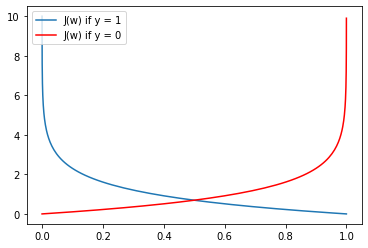

In [25]:
plt.plot(phi_z, c1, label = 'J(w) if y = 1')
plt.plot(phi_z, c2, label = 'J(w) if y = 0', color = 'red')
plt.legend(loc = "upper left")
plt.show()

# The Graident Descent Learning Algorithm For Logistic Regression

The weight update in logistic regression is equal to weight update in Adaline. i.e

$ w _j := w _j + n \sum _{i=1} ^{n} ( y ^{(i)} - \phi {(z ^{(i)})}) x _j ^{(i)} $

# Logistic Regression with Gradient Descent Optimization

The activation function that we will be using here is a sigmoid function, our threshold value will be 0.5

In [58]:
class LogisticRegressionGD(object):
    
    def __init__(self, epoch = 50, learning_rate = 0.01, random_state = 1):
        self.epoch = epoch
        self.learning_rate = learning_rate
        self.random_state = random_state
        
    def net_input(self, X):
        return np.dot(X,self.w_[1:]) + self.w_[0]
    
    def predict(self, X):
        return np.where(self.activation(self.net_input(X)) >= 0.5, 1, 0)
    
    def activation(self,z):
        return 1. / (1. + np.exp(-z))
        
    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc = 0.0, scale = 0.01, size = 1 + X.shape[1])
        self.costs_ = []
        
        for i in range(self.epoch):
            net_input = self.net_input(X)
            output = self.activation(net_input)
            errors = (y - output)
            self.w_[1:] += self.learning_rate * X.T.dot(errors)
            self.w_[0] += self.learning_rate * errors.sum()
            
            cost = (-y.dot(np.log(output))) - ((1 - y).dot(np.log(1-output)))
            self.costs_.append(cost)
            
        return self
            

In [59]:
X_train_01_subset = X_train[(y_train == 0) | (y_train == 1)] #because our model is binary model, so we are taking only two classes
y_train_01_subset = y_train[(y_train)==0 | (y_train == 1)]

In [60]:
print('The shape of our X and y is', X_train_01_subset.shape, y_train_01_subset.shape)

The shape of our X and y is (70, 2) (70,)


In [61]:
model = LogisticRegressionGD(learning_rate=0.05, epoch = 1000)

In [62]:
model.fit(X_train_01_subset, y_train_01_subset)

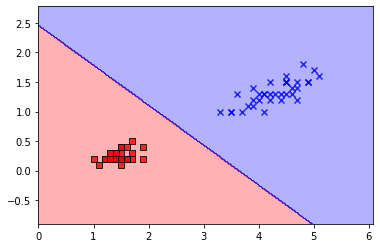

In [63]:
plot_decision_regions(X_train_01_subset,y_train_01_subset, model)

# Training a logistic regression model with scikit-learn

scikit-learn Logistic Regression model support multi-class classification through OvR technique.

In [77]:
from sklearn.linear_model import LogisticRegression

In [79]:
model = LogisticRegression(C=100.0, random_state=1) #X_train_std is standarize data, rememver standarization help in gradient descent optimization, it help in converging earlier
model.fit(X_train_std, y_train)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=100.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=1, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

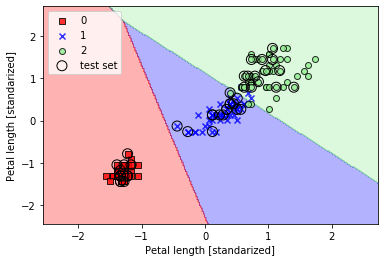

In [80]:
plot_decision_regions(X_combined_std, y_combined, model, range(105,150))
plt.xlabel('Petal length [standarized]')
plt.ylabel('Petal length [standarized]')
plt.legend(loc = 'upper left')
plt.show()

In [83]:
model.predict_proba(X_test_std[:3,:])


array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01],
       [8.33962295e-01, 1.66037705e-01, 4.55557009e-12],
       [8.48762934e-01, 1.51237066e-01, 4.63166788e-13]])

In [85]:
model.predict_proba(X_test_std[:3,:]).sum(axis=1) #total probability sum will be 1

array([1., 1., 1.])

In [88]:
model.predict_proba(X_test_std[0,:].reshape(1,-1))

array([[3.17983737e-08, 1.44886616e-01, 8.55113353e-01]])

In [94]:
model.coef_

array([[-5.61268224, -4.30718677],
       [ 2.40969576, -2.07325711],
       [ 9.51524418,  5.39484899]])

# Tackling overfitting via regularization

**overfitting** is a common problem in machine learning, where a model performs well on training data but does not generalize well to unseen data (test data). If a model suffer from overfitting we can also say that model have high variance (there is trade off between bias and variance), which can be cause by having too many parameters (dimensions).

**underfitting** is a problem in which our model doesn not capture the pattern of data, we also can say that model have high bias.

one way of finding a good bias-variance tradeoff is to tune the complexity of the model via regularization.

**Regularization** is a very useful method to handle collinearity (hig correlation among feature), filter out noise from data, and eventually prevent overfitting.

The concept behind regularization is to introduce additional information (bias) to penalize extreme parameter values. There are two type of regularization, L1 and L2, the most common among them is L2 regularization.

$ \frac {\lambda} {2} ||w|| ^2 = \frac {\lambda} {2} \sum ^m _{j=1} w ^2 _j $, norm of a vector
 
Here,$ \lambda $ is the regularization parameter. By increasing the value of a $\lambda$, we increase the regularization strength. In scikit learn LogisticRegression Model, C is directly related to $\lambda$, which is it inverse

**Note** :- For regularization to work properly all features should be on a comparable scale so we must do feature scaling of our data

So , the cost function by applying L2 regularization will become

$ J(w) = \sum _{i=1} ^{n} [ -y ^{(i)} \log {(\phi{(z ^{(i)})})} - (1 - y ^{(i)})\log {(1 - \phi{(z ^{(i)}})} ] + \frac {\lambda} {2} ||w|| ^2 $

In [95]:
#Plotting the L2-regularization path for the two weight coefficients:
#for visualising how decreasing C will increase the strength of regularization
weights, params = [], []

for c in np.arange(-5,5):
    model = LogisticRegression(C=10. ** c, random_state=1)
    model.fit(X_train_std, y_train)
    weights.append(model.coef_[1]) # we are considering weight of our class 1 in iris datasets 
    params.append(10.**c)

c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
c:\users\dell\appdata\local\programs\python\python36\lib\site-packages\scikit_learn-0.21.2-py3.6-win-amd64.egg\sklearn\linear_model\logistic.py

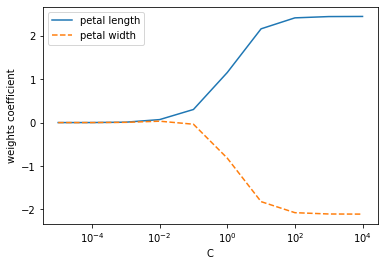

In [96]:
weights = np.array(weights)
plt.plot(params, weights[:,0], label = 'petal length')
plt.plot(params, weights[:,1], label = 'petal width', linestyle = '--')
plt.ylabel('weights coefficient')
plt.xlabel('C')
plt.legend(loc = 'upper left')
plt.xscale('log')
plt.show()

We can observe that as C decreases weight coeffcient shrink thus increasing the regularization.

# Maximum margin classification with support vector machines

Support Vector Machine (SVM) can be considered as an extension of perceptron.